In [1]:
import numpy as np 
import yfinance as yf 
from arch import arch_model 

In [2]:
#Allow the plots generated by mamtplotlib to be displayed
#directly in the notebook interface
%matplotlib inline
import matplotlib.pyplot as plt
#Set the default size for all subsequent plots
plt.rc("figure",figsize=(16,6))
#Set the resolution (dots per inch) for saving figures
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font",size=14)

In [3]:
data= yf.download('aapl',start='2020-01-01' , end='2022-07-31')


[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347939,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634842,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213638,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869301,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041496,132079200
...,...,...,...,...,...,...
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.042114,53623900
2022-07-26,152.259995,153.089996,150.800003,151.600006,150.700134,55138700
2022-07-27,152.580002,157.330002,152.160004,156.789993,155.859314,78620700


In [5]:
# Calculate the adjusted closing prices of a stock and assign them to the variable "adjusted_closes"
#Adjusted closing prices are the closing prices adjusted to account for changes such as stock splits, dividends, rights offerings
adjusted_closes = data['Adj Close']

# Calculate the percentage change in the adjusted closing prices and multiply by 100 to get the returns
# The "pct_change()" function calculates the percentage change between each element and the previous one
# The "dropna()" function removes any NaN (Not a Number) values from the resulting series
returns = 100 * adjusted_closes.pct_change().dropna()


In [6]:
model=arch_model(returns)

Calling an arch_model like this does three things:
1/Uses a constant mean
2/ Assumes a GARCH volatility model
3/Uses a normal distribution for the standardized errors 

In [7]:
res=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.7389175747658
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22626.432136880318
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8154793949593
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.7579218908197
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.355283257119
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.0239094350277
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0232767264786
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.023245805088
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.0232449835182
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.0232449835182
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [8]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Wed, Jun 28 2023   Df Residuals:                      647
Time:                        00:55:14   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

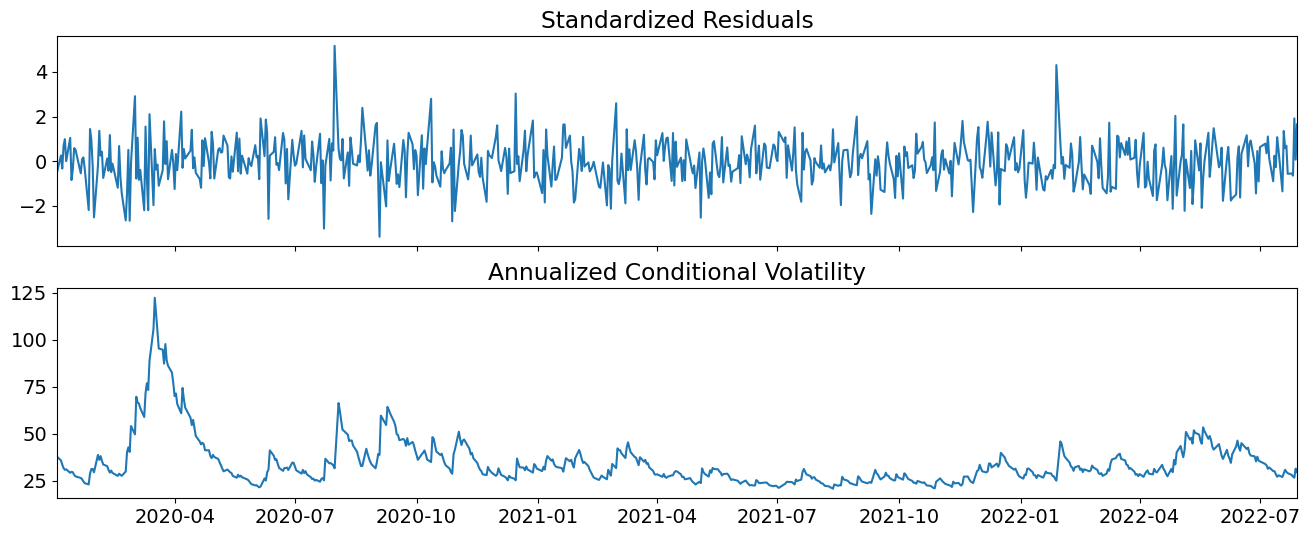

In [9]:
fig=res.plot('D')

In [10]:
forecast=res.forecast(horizon=1, reindex=False)
variance_forecast= forecast.variance.iloc[-1][0]

In [14]:
forecast.variance

,h.1
Date,
2022-07-29,4.311258


In [13]:
volatility_forecast=np.sqrt(variance_forecast)
annualized_volatility_forecast= volatility_forecast* np.sqrt(252)/100
annualized_volatility_forecast

0.3296114229694183

In [18]:
volatility=np.std(returns)* np.sqrt(252)/100
(volatility-annualized_volatility_forecast)/volatility*100


10.666416970561137

In [19]:
volatility

0.36896697948497